#### Capstone Project - Image Processin (MNIST) - By Alex Chu

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems.

The dataset can be accessed from SKLearn (from sklearn.datasets import load_digits)

In this project, I will train a model to recognise the digits.
The data is split into the training data into a training and test set. 
I will create a classification model by using RandomForestClassifier.
A parameter will be tuned and the best value for the parameter will be chosen.
A confusion matrix will also be created.
I will reprot which classes the model struggles with the most with the accuracy, precision, recall, and f1-score.


In [1]:
import numpy as np

import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()

Explore the data shape:

In [2]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)

# Print to show there are 1797 labels (integers from 0-9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


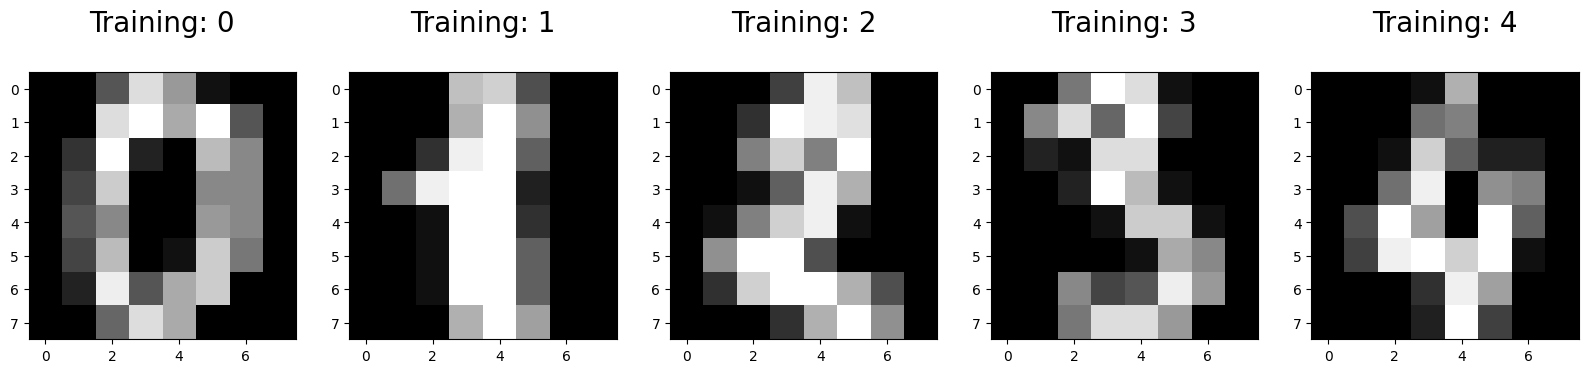

In [3]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

###  Image Processing

#### Load the MNIST dataset. Use a library such as SKLearn to access the dataset (from sklearn.datasets import load_digits).

In [4]:
# Impport libraries
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import load_digits


In [5]:
# Load the MNIST dataset
digits = load_digits()

#### Split the training data into a training and test set. Add a comment explaining the purpose of the train and test sets

In [6]:
# Split the data into training, development, and test sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)
X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

Split the training data into a training set and a test set. In machine learning, the purpose of the train and test sets is as follows:

Training set: Used to train the model, i.e., to fit the model's parameters based on the input features and corresponding target labels.

Test set: Used to evaluate the trained model's performance on unseen data. It helps assess how well the model generalizes to new, unseen samples.

#### Use the RandomForestClassifier built into sklearn to create a classification model.
####  Picking a parameter to tune, and explain the reasons.

max_depth will be chosen as parameter to tune.

The reason for selecting 'max_depth' as a parameter to tune is that it directly affects the complexity of the decision trees in the Random Forest model. A lower value of 'max_depth' can lead to simpler trees with fewer levels, reducing the risk of overfitting. On the other hand, a higher value of 'max_depth' allows the trees to grow deeper and capture more complex relationships in the data. By including different values of 'max_depth' in the parameter grid, we can systematically explore the trade-off between model complexity and performance to find the optimal value for your specific problem.

In [7]:
# Define the parameter grid for grid search
param_grid = {'max_depth': [5, 10, 15, 20, 25, 30, 35, 40]}

# Create the RandomForestClassifier instance
clf = RandomForestClassifier(random_state=42)

# Perform grid search and model selection using the development set
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, 15, 20, 25, 30, 35, 40]})

#### Choosing the value for the parameter to set for testing on the test data

In [8]:
# Get the best parameter and model
best_max_depth = grid_search.best_params_['max_depth']
best_model = grid_search.best_estimator_

# To show which is the best max_depth
best_max_depth

20

When selecting a value for the parameter to test on the test data, it is generally recommended to choose the best parameter obtained from the grid search process. The grid search process evaluates the performance of the model using cross-validation on the development set for each value in the parameter grid. It selects the parameter value that yields the best performance according to the chosen evaluation metric. By using this best parameter value on the test data, we can assess how well the model generalizes to unseen instances.

Therefore, the best max_depth (20) is set on the model for the test.

In [9]:
# Evaluate the best model on the development set
y_pred_dev = best_model.predict(X_dev)
accuracy_dev = accuracy_score(y_dev, y_pred_dev)
precision_dev = precision_score(y_dev, y_pred_dev, average=None)
recall_dev = recall_score(y_dev, y_pred_dev, average=None)
f1_dev = f1_score(y_dev, y_pred_dev, average=None)
confusion_dev = confusion_matrix(y_dev, y_pred_dev)

# Print out bext max_depth, the development accuracy, precision, recall, F1-score on each class and confusion matrix
print("Best max_depth:", best_max_depth)
print("Development Set Accuracy:", accuracy_dev)
print("Development Set Precision:", precision_dev)
print("Development Set Recall:", recall_dev)
print("Development Set F1-Score:", f1_dev)
print("Development Set Confusion Matrix:")
print(confusion_dev)

Best max_depth: 20
Development Set Accuracy: 0.9895833333333334
Development Set Precision: [1.         1.         1.         1.         1.         0.96428571
 1.         0.96774194 0.95238095 1.        ]
Development Set Recall: [1.         1.         1.         1.         0.96428571 1.
 1.         0.96774194 0.95238095 1.        ]
Development Set F1-Score: [1.         1.         1.         1.         0.98181818 0.98181818
 1.         0.96774194 0.95238095 1.        ]
Development Set Confusion Matrix:
[[23  0  0  0  0  0  0  0  0  0]
 [ 0 35  0  0  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  0 32  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  1  0  0]
 [ 0  0  0  0  0 27  0  0  0  0]
 [ 0  0  0  0  0  0 25  0  0  0]
 [ 0  0  0  0  0  0  0 30  1  0]
 [ 0  0  0  0  0  1  0  0 20  0]
 [ 0  0  0  0  0  0  0  0  0 28]]


#### Printing the confusion matrix for your Random Forest model on the test set.

In [10]:
# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)
confusion = confusion_matrix(y_test, y_pred)

# Print out test set accuracy, precision, recall, F1-score on each class and confusion matrix
print("Test Set Accuracy:", accuracy)
print("Test Set Precision:", precision)
print("Test Set Recall:", recall)
print("Test Set F1-Score:", f1)
print("Test Set Confusion Matrix:")
print(confusion)

Test Set Accuracy: 0.9666666666666667
Test Set Precision: [1.         0.93333333 1.         0.97058824 0.9787234  0.93617021
 0.97142857 0.97058824 1.         0.925     ]
Test Set Recall: [0.96969697 1.         1.         0.97058824 1.         0.93617021
 0.97142857 0.97058824 0.93333333 0.925     ]
Test Set F1-Score: [0.98461538 0.96551724 1.         0.97058824 0.98924731 0.93617021
 0.97142857 0.97058824 0.96551724 0.925     ]
Test Set Confusion Matrix:
[[32  0  0  0  1  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 44  1  0  0  2]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  2  0  0  0  0  0  0 28  0]
 [ 0  0  0  1  0  1  0  1  0 37]]


#### Reporting which classes the model struggles with the most.


In [11]:
# Print precision, recall, f1-score, and accuracy for each class
for i in range(len(precision)):
    class_accuracy = accuracy_score(y_test[y_test == i], y_pred[y_test == i])
    print("Class {}: Precision={}, Recall={}, F1-Score={}, Accuracy={}".format(i, precision[i], recall[i], f1[i], class_accuracy))


Class 0: Precision=1.0, Recall=0.9696969696969697, F1-Score=0.9846153846153847, Accuracy=0.9696969696969697
Class 1: Precision=0.9333333333333333, Recall=1.0, F1-Score=0.9655172413793104, Accuracy=1.0
Class 2: Precision=1.0, Recall=1.0, F1-Score=1.0, Accuracy=1.0
Class 3: Precision=0.9705882352941176, Recall=0.9705882352941176, F1-Score=0.9705882352941176, Accuracy=0.9705882352941176
Class 4: Precision=0.9787234042553191, Recall=1.0, F1-Score=0.989247311827957, Accuracy=1.0
Class 5: Precision=0.9361702127659575, Recall=0.9361702127659575, F1-Score=0.9361702127659575, Accuracy=0.9361702127659575
Class 6: Precision=0.9714285714285714, Recall=0.9714285714285714, F1-Score=0.9714285714285714, Accuracy=0.9714285714285714
Class 7: Precision=0.9705882352941176, Recall=0.9705882352941176, F1-Score=0.9705882352941176, Accuracy=0.9705882352941176
Class 8: Precision=1.0, Recall=0.9333333333333333, F1-Score=0.9655172413793104, Accuracy=0.9333333333333333
Class 9: Precision=0.925, Recall=0.925, F1-S

In [12]:
# Calculate per-class metrics
class_labels = np.unique(digits.target)
class_precision = precision_score(y_test, y_pred, average=None)
class_recall = recall_score(y_test, y_pred, average=None)
class_f1 = f1_score(y_test, y_pred, average=None)
class_accuracy = accuracy_score(y_test, y_pred)

# Find classes with lowest precision, recall, F1-score, and accuracy
worst_precision_class = class_labels[np.argmin(class_precision)]
worst_recall_class = class_labels[np.argmin(class_recall)]
worst_f1_class = class_labels[np.argmin(class_f1)]
worst_accuracy_class = class_labels[np.argmin(class_accuracy)]

# Print the class with lowest precision, recall, F1-score, and accuracy
print("Class with lowest precision:", worst_precision_class)
print("Class with lowest recall:", worst_recall_class)
print("Class with lowest F1-score:", worst_f1_class)
print("Class with lowest accuracy:", worst_accuracy_class)

Class with lowest precision: 9
Class with lowest recall: 9
Class with lowest F1-score: 9
Class with lowest accuracy: 0


Based on the provided results, it appears that the model struggles the most with Class 9. This can be determined by examining the precision, recall, F1-score, and accuracy values for each class.

The precision, recall, F1-score, and accuracy for Class 9 are as follows:

Precision: 0.925
Recall: 0.925
F1-Score: 0.925
Accuracy: 0.925
Comparing these values with the other classes, we can see that Class 9 has the lowest precision, recall, F1-score, and accuracy among all the classes.

Therefore, the model struggles the most with correctly classifying instances belonging to Class 9.

#### Reporting the accuracy, precision, recall, and f1-score (HINT: use average=”macro” in precision_score, recall_score and f1_score from sklearn).

In [13]:
# Calculate precision, recall, f1-score, and accuracy using the 'macro' averaging
macro_precision = precision_score(y_test, y_pred, average='macro')
macro_recall = recall_score(y_test, y_pred, average='macro')
macro_f1 = f1_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Macro Precision:", macro_precision)
print("Macro Recall:", macro_recall)
print("Macro F1-Score:", macro_f1)

Accuracy: 0.9666666666666667
Macro Precision: 0.9685831992371418
Macro Recall: 0.9676805557813069
Macro F1-Score: 0.9678672433984727


#### Additional exploration:
I am curious about training and development accuracies acrosss different max_depth, so I am trying to plot a graph showing the accuracy.

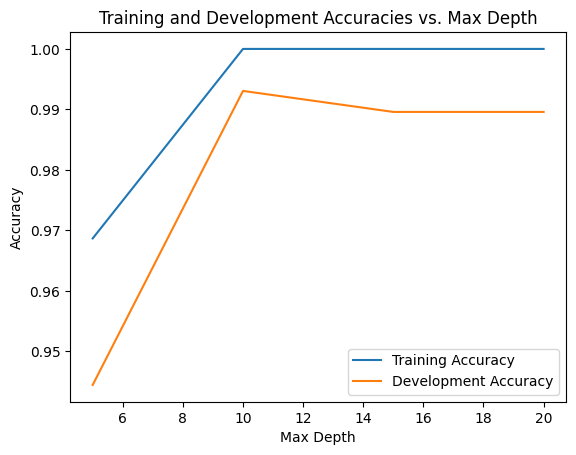

Best max_depth: 10


In [14]:
# Define the max_depth values to try
max_depth_values = [5, 10, 15, 20]

# Initialize lists to store training and development accuracies
train_accuracies = []
dev_accuracies = []

# Train random forests with different max_depth values
for max_depth in max_depth_values:
    # Train the random forest
    clf = RandomForestClassifier(max_depth=max_depth, random_state=42)
    clf.fit(X_train, y_train)

    # Compute accuracies on training and development sets
    train_accuracy = clf.score(X_train, y_train)
    dev_accuracy = clf.score(X_dev, y_dev)

    # Store accuracies
    train_accuracies.append(train_accuracy)
    dev_accuracies.append(dev_accuracy)

# Find the best max_depth value based on development accuracy
best_max_depth = max_depth_values[np.argmax(dev_accuracies)]

# Plot the training and development accuracies
plt.plot(max_depth_values, train_accuracies, label="Training Accuracy")
plt.plot(max_depth_values, dev_accuracies, label="Development Accuracy")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training and Development Accuracies vs. Max Depth")
plt.show()

print("Best max_depth:", best_max_depth)

Interestingly, the best max_depth in this method is different from grid search with cross-validation.

Grid search approach is preferred:

Guarding against overfitting: Cross-validation helps to estimate how well the model will generalize to unseen data. By evaluating the model's performance on multiple subsets of the data, it provides a more robust assessment of the model's performance across different max_depth values. This helps prevent overfitting, where the model performs well on the training data but poorly on new data.

While looking at the highest development accuracy alone can give you a rough idea of the best max_depth, it may not always lead to the most optimal or generalizable model. Grid search with cross-validation offers a more robust and systematic approach to selecting the best hyperparameters, including max_depth, by considering the model's performance across different parameter values and assessing its ability to generalize to unseen data.